# Collaborative Filtering for Movies Recommandation

In [1]:
import sys
# needed modules
path_to_modules = '../../algorithms_in_python/week_9/ex8/'
sys.path.append(path_to_modules)
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import scipy.optimize as op

from checkCostFunction import checkCostFunction
from cofiCostFunc import cofiCostFunc
from loadMovieList import loadMovieList
from normalizeRatings import normalizeRatings

## Part 1: Loading movie ratings dataset
  You will start by loading the movie ratings dataset to understand the
  structure of the data.

Loading movie ratings dataset.


Average rating for movie 1 (Toy Story): 4.861081654294804 / 5




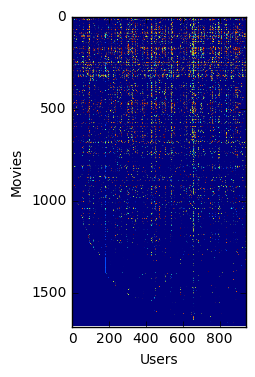

In [2]:
print('Loading movie ratings dataset.\n\n')

#  Load data
mat_contents = sio.loadmat(path_to_modules + 'ex8_movies.mat')
R = mat_contents.get('R')
Y = mat_contents.get('Y')

#  Y is a 1682x943 matrix, containing ratings (1-5) of 1682 movies on 
#  943 users
#
#  R is a 1682x943 matrix, where R(i,j) = 1 if and only if user j gave a
#  rating to movie i

#  From the matrix, we can compute statistics like average rating.
print('Average rating for movie 1 (Toy Story): {} / 5\n\n'.format(np.mean(Y[0, R[1, :]])))

#  We can "visualize" the ratings matrix by plotting it with imagesc
plt.imshow(Y)
plt.ylabel('Movies')
plt.xlabel('Users')
plt.draw()
plt.show(block=False)

## Part 2: Collaborative Filtering Cost Function 
  You will now implement the cost function for collaborative filtering.
  To help you debug your cost function, we have included set of weights
  that we trained on that. Specifically, you should complete the code in 
  cofiCostFunc.m to return J.

In [3]:
#  Load pre-trained weights (X, Theta, num_users, num_movies, num_features)
mat_contents = sio.loadmat(path_to_modules + 'ex8_movieParams.mat')
X = mat_contents.get('X')
Theta = mat_contents.get('Theta')

#  Reduce the data set size so that this runs faster
num_users = 4
num_movies = 5
num_features = 3

X = X[0:num_movies, 0:num_features]
Theta = Theta[0:num_users, 0:num_features]
Y = Y[0:num_movies, 0:num_users]
R = R[0:num_movies, 0:num_users]

#  Evaluate cost function
params = np.r_[X.flatten(), Theta.flatten()].reshape(-1, 1)
J, grad = cofiCostFunc(params, Y, R, num_users, num_movies, num_features, 0)

print('Cost at loaded parameters: {} \n(this value should be about 22.22)\n'.format(J))

Cost at loaded parameters: 22.224603725685675 
(this value should be about 22.22)



## Part 3: Collaborative Filtering Gradient
  Once your cost function matches up with ours, you should now implement 
  the collaborative filtering gradient function. Specifically, you should 
  complete the code in cofiCostFunc.m to return the grad argument.

In [4]:
print('\nChecking Gradients (without regularization) ... \n')

#  Check gradients by running checkNNGradients
checkCostFunction()


Checking Gradients (without regularization) ... 

[[ 3.08749736  3.08749736]
 [ 4.54147467  4.54147467]
 [ 1.94380885  1.94380885]
 [-0.49847576 -0.49847576]
 [ 2.24670064  2.24670064]
 [ 1.12762483  1.12762483]
 [-3.12818017 -3.12818017]
 [ 2.12390299  2.12390299]
 [-0.17885637 -0.17885637]
 [-1.176849   -1.176849  ]
 [-1.28122271 -1.28122271]
 [ 0.12204051  0.12204051]
 [ 1.18346831  1.18346831]
 [-0.16452847 -0.16452847]
 [-1.5524609  -1.5524609 ]
 [ 0.02337707  0.02337707]
 [-0.7993597  -0.7993597 ]
 [-1.04523905 -1.04523905]
 [-0.40229887 -0.40229887]
 [-2.02873556 -2.02873556]
 [-0.61846593 -0.61846593]
 [-0.18495935 -0.18495935]
 [-2.99163982 -2.99163982]
 [-1.64000699 -1.64000699]
 [-0.04443623 -0.04443623]
 [ 0.49580352  0.49580352]
 [ 0.11942034  0.11942034]]
The above two columns you get should be very similar. (Left-Your Numerical Gradient, Right-Analytical Gradient)


If your cost function implementation is correct, then 
 the relative difference will be small (less than 

## Part 4: Collaborative Filtering Cost Regularization
  Now, you should implement regularization for the cost function for 
  collaborative filtering. You can implement it by adding the cost of
  regularization to the original cost computation.

In [5]:
#  Evaluate cost function
J, grad = cofiCostFunc(params, Y, R, num_users, num_movies, num_features, 1.5)

print('Cost at loaded parameters (lambda = 1.5): {} \n(this value should be about 31.34)\n'.format(J))

Cost at loaded parameters (lambda = 1.5): 31.34405624427422 
(this value should be about 31.34)



## Part 5: Collaborative Filtering Gradient Regularization
  Once your cost matches up with ours, you should proceed to implement 
  regularization for the gradient.

In [6]:
print('\nChecking Gradients (with regularization) ... \n')

#  Check gradients by running checkNNGradients
checkCostFunction(1.5)


Checking Gradients (with regularization) ... 

[[  7.40468035   7.40468035]
 [-14.38554505 -14.38554505]
 [  3.2531071    3.2531071 ]
 [  3.44047272   3.44047272]
 [  0.3724934    0.3724934 ]
 [ -1.56546969  -1.56546969]
 [  5.30438717   5.30438717]
 [  8.69157607   8.69157607]
 [-10.68926766 -10.68926766]
 [  0.59829712   0.59829712]
 [  3.42102875   3.42102875]
 [ -4.62340993  -4.62340993]
 [ -2.02933815  -2.02933815]
 [ -0.61751987  -0.61751987]
 [  1.81558782   1.81558782]
 [ -7.45066835  -7.45066835]
 [ -1.63377132  -1.63377132]
 [  8.70170328   8.70170328]
 [  4.05918945   4.05918945]
 [-11.12930576 -11.12930576]
 [  1.93523905   1.93523905]
 [  3.14152172   3.14152172]
 [ -2.73285372  -2.73285372]
 [ -0.2598206   -0.2598206 ]
 [ -3.34435024  -3.34435024]
 [ -4.81327071  -4.81327071]
 [  9.66446619   9.66446619]]
The above two columns you get should be very similar. (Left-Your Numerical Gradient, Right-Analytical Gradient)


If your cost function implementation is correct, then 

## Part 6: Entering ratings for a new user
  Before we will train the collaborative filtering model, we will first
  add ratings that correspond to a new user that we just observed. This
  part of the code will also allow you to put in your own ratings for the
  movies in our dataset!

In [7]:
movieList = loadMovieList(path_to_modules + 'movie_ids.txt')

#  Initialize my ratings
my_ratings = np.zeros((1682, 1))

# Check the file movie_idx.txt for id of each movie in our dataset
# For example, Toy Story (1995) has ID 1, so to rate it "4", you can set
my_ratings[0] = 4

# Or suppose did not enjoy Silence of the Lambs (1991), you can set
my_ratings[97] = 2

# We have selected a few movies we liked / did not like and the ratings we
# gave are as follows:
my_ratings[6] = 3
my_ratings[11] = 5
my_ratings[53] = 4
my_ratings[63] = 5
my_ratings[65] = 3
my_ratings[68] = 5
my_ratings[182] = 4
my_ratings[225] = 5
my_ratings[354] = 5

print('\n\nNew user ratings:\n')
for i in range(len(my_ratings)):
    if my_ratings[i] > 0:
        print('Rated {} for {}'.format(my_ratings[i], movieList[i]))



New user ratings:

Rated [ 4.] for Toy Story (1995)
Rated [ 3.] for Twelve Monkeys (1995)
Rated [ 5.] for Usual Suspects, The (1995)
Rated [ 4.] for Outbreak (1995)
Rated [ 5.] for Shawshank Redemption, The (1994)
Rated [ 3.] for While You Were Sleeping (1995)
Rated [ 5.] for Forrest Gump (1994)
Rated [ 2.] for Silence of the Lambs, The (1991)
Rated [ 4.] for Alien (1979)
Rated [ 5.] for Die Hard 2 (1990)
Rated [ 5.] for Sphere (1998)


## Part 7: Learning Movie Ratings
  Now, you will train the collaborative filtering model on a movie rating 
  dataset of 1682 movies and 943 users

In [8]:
print('\nTraining collaborative filtering...\n')

#  Load data
mat_contents = sio.loadmat(path_to_modules + 'ex8_movies.mat')
R = mat_contents.get('R')
Y = mat_contents.get('Y')
#  Y is a 1682x943 matrix, containing ratings (1-5) of 1682 movies by
#  943 users
#
#  R is a 1682x943 matrix, where R(i,j) = 1 if and only if user j gave a
#  rating to movie i

#  Add our own ratings to the data matrix
Y = np.c_[my_ratings, Y]
R = np.c_[(my_ratings != 0).astype(int), R]

#  Normalize Ratings
Ynorm, Ymean = normalizeRatings(Y, R)


#  Useful Values
num_movies, num_users = Y.shape
num_features = 10

# Set Initial Parameters (Theta, X)
X = np.random.randn(num_movies, num_features)
Theta = np.random.randn(num_users, num_features)

initial_parameters = np.r_[X.flatten(), Theta.flatten()].reshape(-1, 1)

# Set Regularization
reg_lambda = 10

costFn = lambda t: cofiCostFunc(t, Ynorm, R, num_users, num_movies, num_features, reg_lambda, returnCostOnly=True)
gradFn = lambda t: cofiCostFunc(t, Ynorm, R, num_users, num_movies, num_features, reg_lambda, returnGradOnly=True)

Result = op.minimize(fun=costFn, x0=initial_parameters, method='TNC', jac=gradFn,
                     options={'maxiter': 100, 'disp': True})
theta = Result.x

# Unfold the returned theta back into U and W
X = theta[0:num_movies * num_features].reshape((num_movies, num_features))
Theta = theta[num_movies * num_features:].reshape((num_users, num_features))

print('Recommender system learning completed.\n')


Training collaborative filtering...

Recommender system learning completed.



## Part 8: Recommendation for you 
  After training the model, you can now make recommendations by computing
  the predictions matrix.

In [9]:
p = X.dot(Theta.T)

my_predictions = p[:, 0].reshape(-1, 1) + Ymean


sorted_idxs = (-my_predictions.flatten()).argsort()

print('\nTop recommendations for you:\n')
for i in range(10):
    j = sorted_idxs[i]
    print('Predicting rating {} for movie {}'.format(int(np.round(my_predictions[j])), movieList[j]))

print('\n\nOriginal ratings provided:\n')

for i in range(len(my_ratings)):
    if my_ratings[i] > 0:
        print('Rated {} for {}'.format(my_ratings[i], movieList[i]))


Top recommendations for you:

Predicting rating 5 for movie Marlene Dietrich: Shadow and Light (1996)
Predicting rating 5 for movie Santa with Muscles (1996)
Predicting rating 5 for movie Entertaining Angels: The Dorothy Day Story (1996)
Predicting rating 5 for movie Star Kid (1997)
Predicting rating 5 for movie Aiqing wansui (1994)
Predicting rating 5 for movie They Made Me a Criminal (1939)
Predicting rating 5 for movie Great Day in Harlem, A (1994)
Predicting rating 5 for movie Someone Else's America (1995)
Predicting rating 5 for movie Saint of Fort Washington, The (1993)
Predicting rating 5 for movie Prefontaine (1997)


Original ratings provided:

Rated [ 4.] for Toy Story (1995)
Rated [ 3.] for Twelve Monkeys (1995)
Rated [ 5.] for Usual Suspects, The (1995)
Rated [ 4.] for Outbreak (1995)
Rated [ 5.] for Shawshank Redemption, The (1994)
Rated [ 3.] for While You Were Sleeping (1995)
Rated [ 5.] for Forrest Gump (1994)
Rated [ 2.] for Silence of the Lambs, The (1991)
Rated [ 4.